In [1]:
import glob
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns

In [2]:
train_runs = glob.glob("./results/*/")

In [3]:
test_results = {
    "mrpc": {},
    "mrpc_cor": {},
}

model_name_list = []
data_list = []
f1_list = []

train_runs = glob.glob("./results/*/")

for s in train_runs:
    for r in ["deberta-base", "deberta-large"]:
        data_results = glob.glob(s+r+"/*/")
        for i in data_results:
            try:
                test_result = i+"all_results.json"
                with open(test_result) as f:
                      data = json.load(f)
                test_f1 = data["valid_f1"]
                model_name = i.split("/")[3]
                model_name = model_name.replace(".", "/")
                dataset = i.split("/")[2]
                try:
                    _ = test_results[dataset][model_name]
                    test_results[dataset][model_name].append(test_f1*100)
                except KeyError:
                    test_results[dataset][model_name] = [test_f1*100]
                short_model_name = model_name.split("/")[-1]
                if len(short_model_name) > 24:
                    short_model_name = short_model_name[:20]+"..."
                model_name_list.append(short_model_name)
                data_list.append(dataset)
                f1_list.append(test_f1*100)
            except Exception as e:
                print(e)

In [4]:
test_results

{'mrpc': {'deberta-base': [30.669902071236677,
   37.55242460127764,
   35.672076230282116,
   31.811361221477704,
   30.669902071236677],
  'deberta-large': [30.808093970432644,
   30.6889575495307,
   30.739057476854853,
   30.795154511543238,
   30.789119147319465]},
 'mrpc_cor': {'deberta-base': [53.256516874822815,
   46.21856123569427,
   50.88188457632702,
   52.25054539359878,
   51.45301752677981],
  'deberta-large': [57.10744273529187,
   55.98211735917019,
   51.15057259286018,
   56.03567794317386,
   54.217306705892824]}}

In [5]:
df = pd.DataFrame(list(zip(model_name_list, data_list, f1_list)),
                     columns =["model_name", "dataset", "test_f1"])

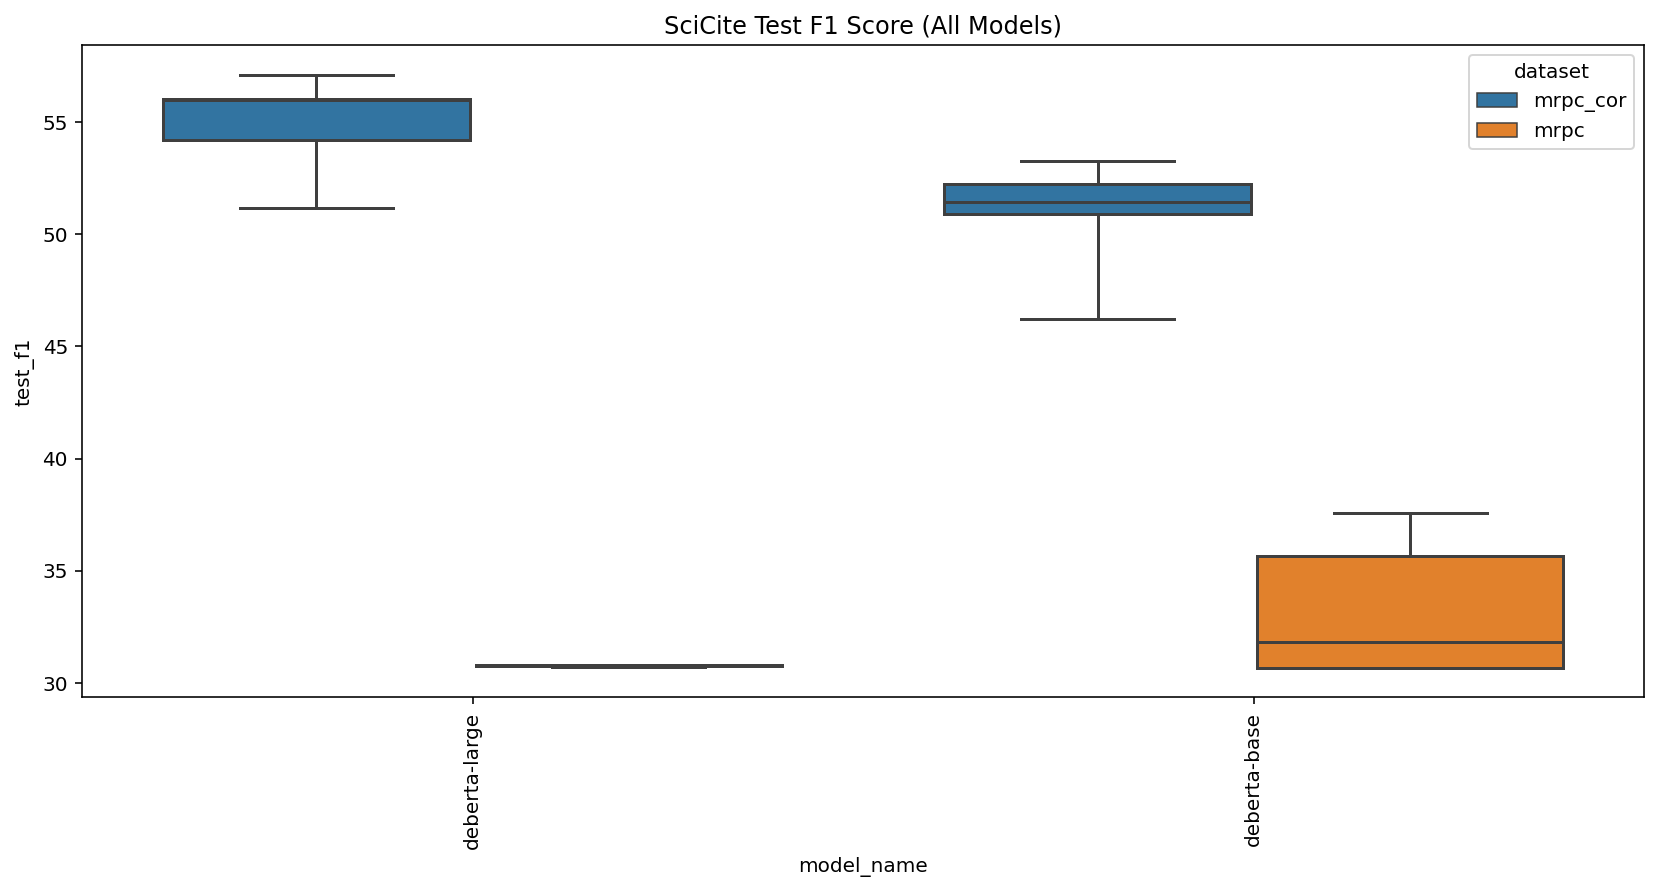

In [6]:
plt.figure(figsize=(14,6))
sns.boxplot(x="model_name", y="test_f1",
            hue="dataset", whis=20,
            data=df.sort_values(["model_name"], ascending=False))
plt.xticks(rotation=90)
plt.title("SciCite Test F1 Score (All Models)")
plt.show()

In [7]:
for d in ["mrpc", "mrpc_cor"]:
    split = test_results[d]
    model_name_list = split.keys()
    for m in model_name_list:
        result = split[m]
        mean = round(sum(result)/len(result), 2)
        print(d, m, mean)

mrpc deberta-base 33.28
mrpc deberta-large 30.76
mrpc_cor deberta-base 50.81
mrpc_cor deberta-large 54.9


In [8]:
for d in ["mrpc", "mrpc_cor"]:
    split = test_results[d]
    model_name_list = split.keys()
    for m in model_name_list:
        result = split[m]
        result.sort()
        #print(result)
        median = round(result[3],2)
        print(d, m, median)

mrpc deberta-base 35.67
mrpc deberta-large 30.8
mrpc_cor deberta-base 52.25
mrpc_cor deberta-large 56.04
